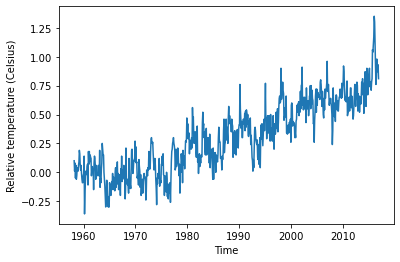

In [2]:
%matplotlib inline
#%matplotlib notebook

# Import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt



# Read the data from file using read_csv
climate_change = pd.read_csv('climate_change.csv', parse_dates=['date'], index_col='date')

# Create the plot
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

plt.show()

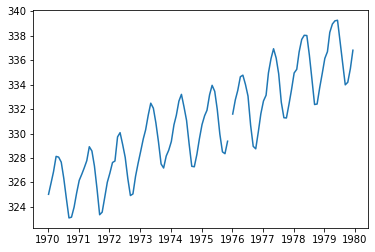

In [3]:
fig, ax = plt.subplots()
# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change['1970-01-01':'1979-12-31']

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])
plt.show()

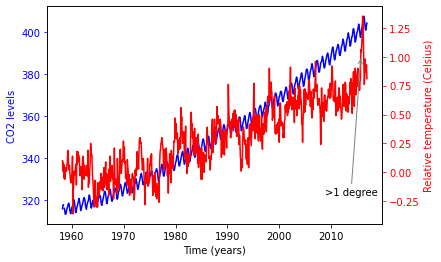

In [4]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", \
                'Relative temperature (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'),1), xytext=(pd.Timestamp('2008-10-06'), -0.2), \
             arrowprops={"arrowstyle":"->", "color":"gray"})
plt.show()

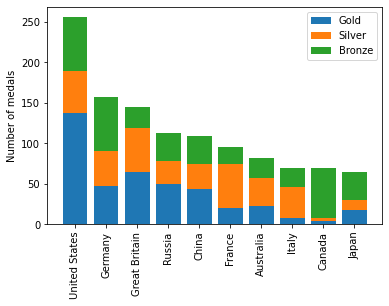

In [5]:
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)

fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=(medals['Gold']+medals['Silver']), label='Bronze')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

# Display the legend
ax.legend()

plt.show()

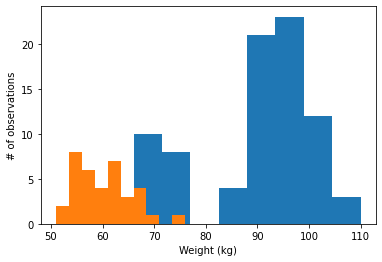

In [7]:
#Import and clean data
athletes = pd.read_csv('summer2016.csv', index_col=0)
mens_rowing = athletes.query('Sport == "Rowing" and Sex == "M"')
mens_gymnastics = athletes.query('Sport == "Gymnastics" and Sex == "M"')

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Weight (kg)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

plt.show()

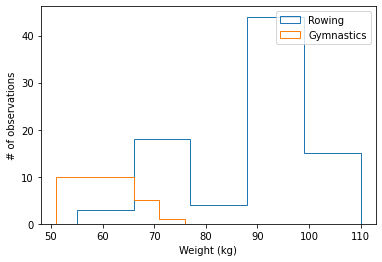

In [8]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], label = "Rowing", histtype='step', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label = "Gymnastics", histtype='step', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

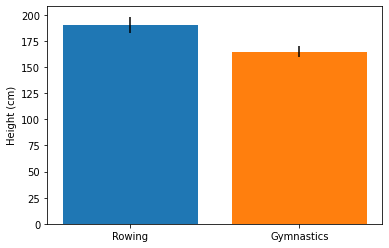

In [10]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

[]

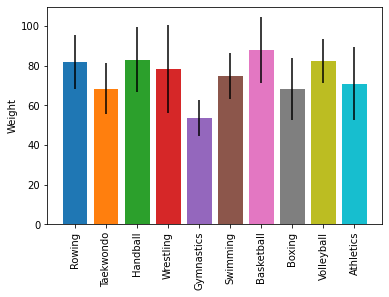

In [68]:
fig, ax = plt.subplots()
sports = athletes['Sport'].unique()
# Loop over the different sports branches
for sport in sports[0:10]:
  # Extract the rows only for this sport
  sport_df = athletes[athletes.Sport == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)
plt.plot()

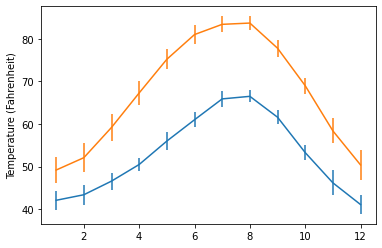

In [53]:
#Import and clean Data
austin_weather = pd.read_csv('austin_weather.csv')
seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = austin_weather.rename(columns = {"DATE":"MONTH"})
seattle_weather = seattle_weather.rename(columns = {"DATE":"MONTH"})
seattle_weather = seattle_weather[seattle_weather.NAME == "SEATTLE SAND PT WSFO, WA US"]
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], yerr=seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'], yerr=austin_weather['MLY-TAVG-STDDEV'])

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

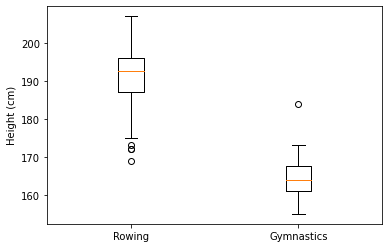

In [54]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'],mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing','Gymnastics'])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

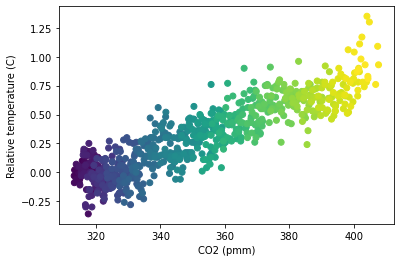

In [56]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (pmm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()